In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


<AxesSubplot:>

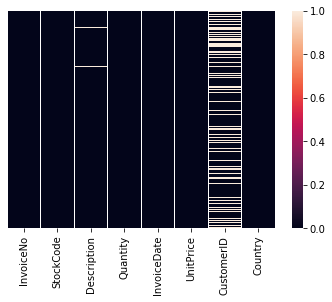

In [6]:
sns.heatmap(df.isnull(),yticklabels=False)

In [7]:
df['CustomerID'].isnull().sum()### We will drop it latter

135080

In [8]:
###Fixing the dataset
from datetime import datetime
df['InvoiceDate']=df['InvoiceDate'].dt.date

In [9]:
df['TotalCost']=df['Quantity']*df['UnitPrice']

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [11]:
import datetime
snapshot_date = max(df['InvoiceDate']) + datetime.timedelta(days=1)

In [12]:
max(df['InvoiceDate'])

datetime.date(2011, 12, 9)

In [13]:
snapshot_date

datetime.date(2011, 12, 10)

### Total Sale of Top 10 products

In [14]:
##Most order item

df_item= df[['Description','Quantity','TotalCost']]

In [15]:
df_item

,Description,Quantity,TotalCost
0,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,WHITE METAL LANTERN,6,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,10.20
541905,CHILDREN'S APRON DOLLY GIRL,6,12.60
541906,CHILDRENS CUTLERY DOLLY GIRL,4,16.60
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60


In [16]:
df_itemg=df_item.groupby(['Description'])

In [17]:
df_item_sales_highest=df_itemg.agg({'Quantity': 'sum','TotalCost': 'sum'}).sort_values(by='TotalCost',ascending=False)

In [18]:
df_item_sales_highest.nlargest(10,'TotalCost')

,Quantity,TotalCost
Description,,
DOTCOM POSTAGE,707,206245.48
REGENCY CAKESTAND 3 TIER,13033,164762.19
WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
PARTY BUNTING,18022,98302.98
JUMBO BAG RED RETROSPOT,47363,92356.03
RABBIT NIGHT LIGHT,30680,66756.59
POSTAGE,3003,66230.64
PAPER CHAIN KIT 50'S CHRISTMAS,18902,63791.94
ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73


In [19]:
sales=df_item_sales_highest.nlargest(10,'TotalCost')

Text(0.5, 1.0, 'Total Sales of Top 10 Products')

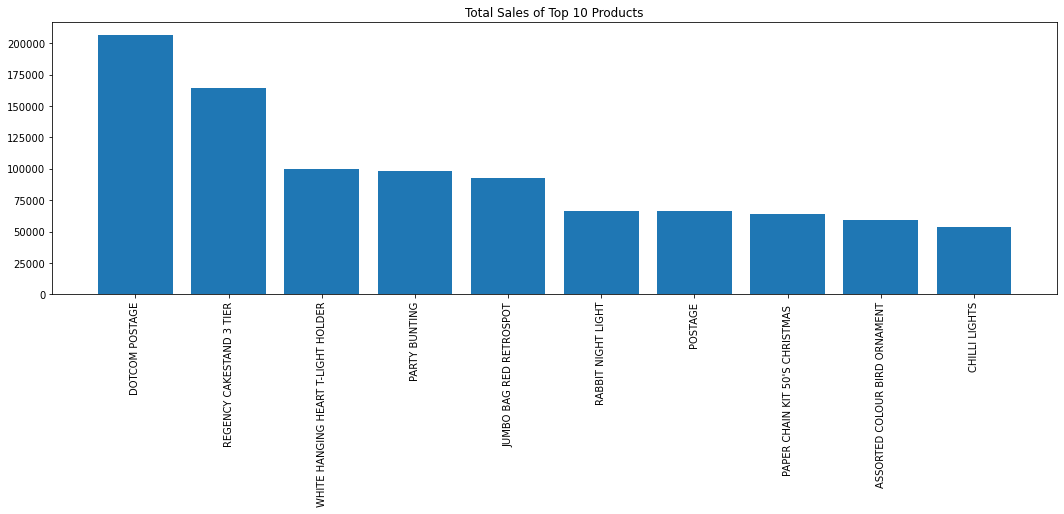

In [20]:
plt.subplots(figsize=(18,5))
plt.bar(sales.index,sales['TotalCost'])
plt.xticks(rotation=90)
plt.title('Total Sales of Top 10 Products')

## Sales by Country

In [21]:
df_country=df[['Country','Description','TotalCost']]
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [22]:
country=df_country.groupby(['Country'])
sales_country=country['TotalCost'].sum()

In [23]:
sales_country.nlargest(10)

Country
United Kingdom    8.187806e+06
Netherlands       2.846615e+05
EIRE              2.632768e+05
Germany           2.216982e+05
France            1.974039e+05
Australia         1.370773e+05
Switzerland       5.638535e+04
Spain             5.477458e+04
Belgium           4.091096e+04
Sweden            3.659591e+04
Name: TotalCost, dtype: float64

In [24]:
dataframe=pd.DataFrame(sales_country.nlargest(10))

In [25]:
dataframe

,TotalCost
Country,
United Kingdom,8.187806e+06
Netherlands,2.846615e+05
EIRE,2.632768e+05
Germany,2.216982e+05
France,1.974039e+05
Australia,1.370773e+05
Switzerland,5.638535e+04
Spain,5.477458e+04
Belgium,4.091096e+04


Text(0.5, 1.0, 'Total Sales in Top 10 Country')

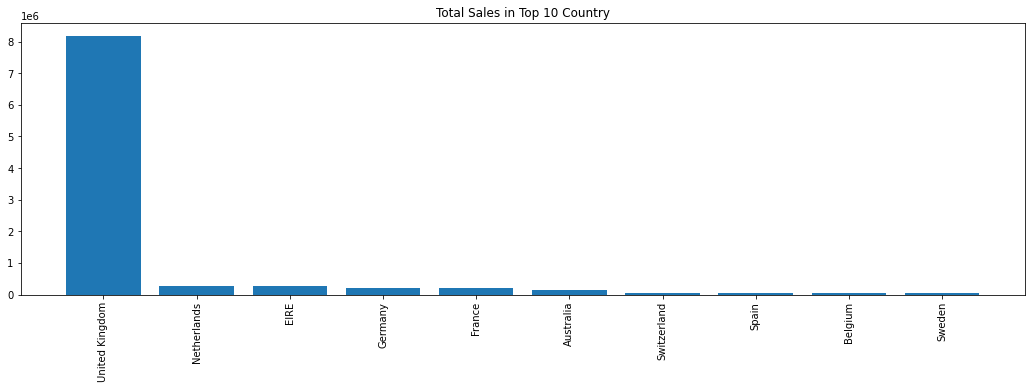

In [26]:
plt.subplots(figsize=(18,5))
plt.bar(dataframe.index,dataframe['TotalCost'])
plt.xticks(rotation=90)
plt.title('Total Sales in Top 10 Country')

### Preprocessing of Data

In [27]:
df['CustomerID'].isnull().sum()

135080

In [28]:
df['CustomerID']=df['CustomerID'].dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [29]:
snapshot_date = max(df['InvoiceDate']) + datetime.timedelta(days=1)
customers = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,'InvoiceNo': 'count','TotalCost': 'sum'})

In [30]:
customers

,InvoiceDate,InvoiceNo,TotalCost
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [31]:
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency'},inplace=True)
                            

In [32]:
customers.sort_values(by='TotalCost',ascending=False,inplace=True)
customers

,Recency,Frequency,TotalCost
CustomerID,,,
14646.0,2,2085,279489.02
18102.0,1,433,256438.49
17450.0,9,351,187482.17
14911.0,2,5903,132572.62
12415.0,25,778,123725.45
...,...,...,...
12503.0,338,1,-1126.00
17603.0,51,15,-1165.30
14213.0,372,5,-1192.20


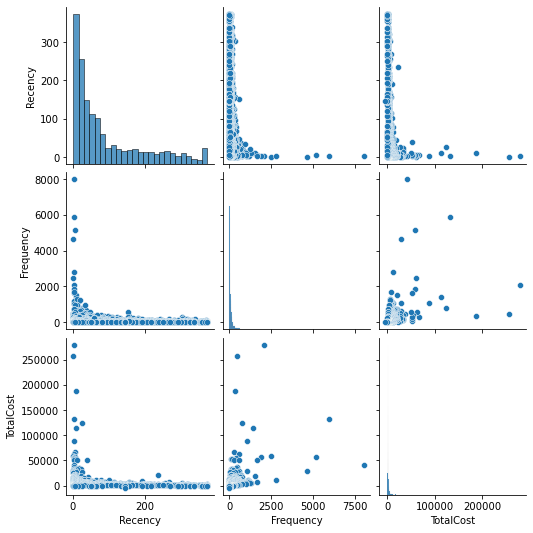

In [33]:
sns.pairplot(customers)

In [34]:
customers.describe()

,Recency,Frequency,TotalCost
count,4372.000000,4372.000000,4372.000000
mean,92.581199,93.053294,1898.459701
std,100.772139,232.471608,8219.345141
min,1.000000,1.000000,-4287.630000
25%,17.000000,17.000000,293.362500
50%,51.000000,42.000000,648.075000
75%,144.000000,102.000000,1611.725000
max,374.000000,7983.000000,279489.020000


D:\Users\13138\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

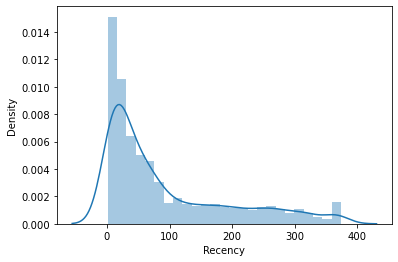

In [35]:
sns.distplot(customers['Recency'])

D:\Users\13138\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

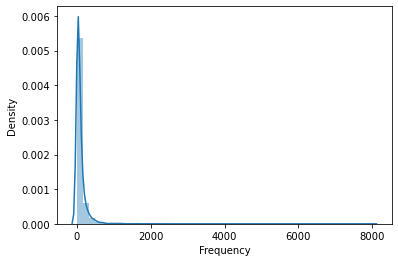

In [36]:
sns.distplot(customers['Frequency'])

D:\Users\13138\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCost', ylabel='Density'>

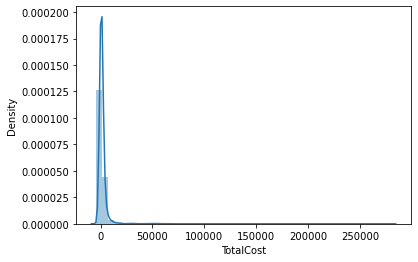

In [37]:
sns.distplot(customers['TotalCost'])

K means are not sensitive to distribution , so we not be converting it into any gaussian distribution, however we will normalize it.



In [38]:

from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()
scaler.fit(customers)
customer_normalized=scaler.transform(customers)

In [40]:
customer_normalized

array([[-0.89897426,  8.56953919, 33.77669478],
       [-0.90889877,  1.46248221, 30.97194985],
       [-0.82950267,  1.10971062, 22.58147515],
       ...,
       [ 2.77309546, -0.37881342, -0.37606563],
       [ 0.52023106, -0.39602179, -0.42477216],
       [ 0.52023106, -0.39602179, -0.7527117 ]])

### Modelling 


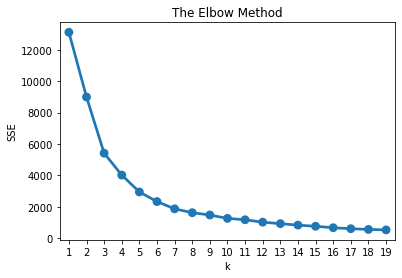

In [41]:


from sklearn.cluster import KMeans
error={}
for k in range(1,20):
    kmeans=KMeans(k)
    kmeans.fit(customer_normalized)
    error[k]=kmeans.inertia_
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(error.keys()), y=list(error.values()))
plt.show()

In [42]:
model=KMeans(3)
model.fit(customer_normalized)
model.labels_.shape

(4372,)

### Evaluating 

In [43]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'TotalCost':['mean', 'count']}).round(2)

Recency Frequency  TotalCost      
           mean      mean       mean count
Cluster                                   
0         40.67    104.96    1952.63  3260
1        247.39     27.74     463.59  1100
2          5.33   2845.58  118713.02    12